In [5]:
# import the lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('heart.csv')
print('Data loaded')

Data loaded


In [7]:
data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1,normal,Yes


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       303 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [9]:
# unique value in each column
data.nunique()

Age           41
Sex            2
ChestPain      4
RestBP        50
Chol         152
Fbs            2
RestECG        3
MaxHR         91
ExAng          2
Oldpeak       40
Slope          3
Ca             4
Thal           3
AHD            2
dtype: int64

In [10]:
data.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.683168
std,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.944808
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [11]:
# check distribution of target 
data['AHD'].value_counts()

No     164
Yes    139
Name: AHD, dtype: int64

<AxesSubplot: >

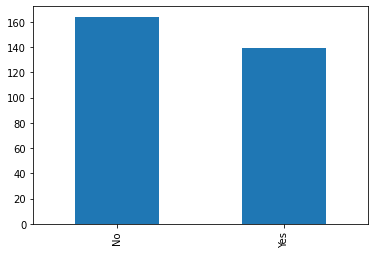

In [12]:
data['AHD'].value_counts().plot(kind='bar')

In [17]:
data['Sex'].value_counts()

1    206
0     97
Name: Sex, dtype: int64

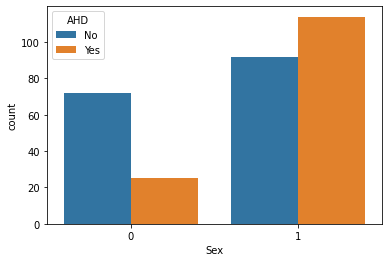

In [18]:
# relationship between gender vs AHD
sns.countplot(x=data['Sex'], hue='AHD', data=data)
plt.show()

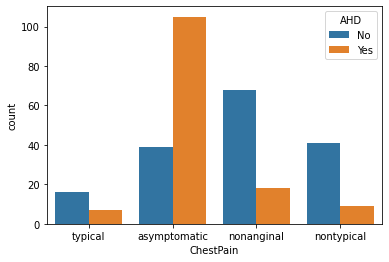

In [19]:
# relationship between chestpain vs AHD
sns.countplot(x=data['ChestPain'], hue='AHD', data=data)
plt.show()

<AxesSubplot: >

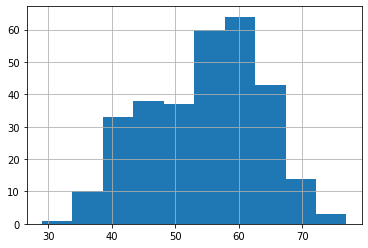

In [20]:
data['Age'].hist()

In [30]:
data['ChestPain'].value_counts()

asymptomatic    144
nonanginal       86
nontypical       50
typical          23
Name: ChestPain, dtype: int64

In [31]:
data['AHD'] = data['AHD'].replace({'Yes': 1, 'No': 0})

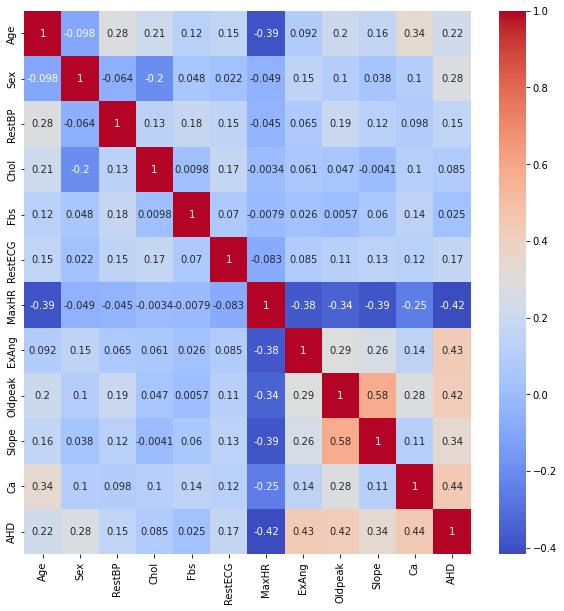

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [33]:
data.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca             int64
Thal          object
AHD            int64
dtype: object

In [34]:
# create dummy variables for categorical features
df = pd.get_dummies(data, columns=['ChestPain', 'Thal'], drop_first=True)

In [35]:
df

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
0,63,1,145,233,1,2,150,0,2.3,3,0,0,0,0,1,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3,1,0,0,0,1,0
2,67,1,120,229,0,2,129,1,2.6,2,2,1,0,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0,0,1,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,110,264,0,0,132,0,1.2,2,0,1,0,0,1,0,1
299,68,1,144,193,1,0,141,0,3.4,2,2,1,0,0,0,0,1
300,57,1,130,131,0,0,115,1,1.2,2,1,1,0,0,0,0,1
301,57,0,130,236,0,2,174,0,0.0,2,1,1,0,1,0,1,0


In [36]:
# create independent & dependent variables
X = df.drop('AHD', axis=1)
y = df['AHD']

In [38]:
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: AHD, Length: 303, dtype: int64

In [39]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable
132,29,1,130,204,0,2,202,0,0.0,1,0,0,1,0,1,0
202,57,1,150,126,1,0,173,0,0.2,1,1,1,0,0,0,1
196,69,1,160,234,1,2,131,0,0.1,2,1,0,0,1,1,0
75,65,0,160,360,0,2,151,0,0.8,1,0,1,0,0,1,0
176,52,1,108,233,1,0,147,0,0.1,1,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,54,1,192,283,0,2,195,0,0.0,1,1,0,1,0,0,1
71,67,1,125,254,1,0,163,0,0.2,2,2,0,0,0,0,1
106,59,1,140,177,0,0,162,1,0.0,1,1,0,0,0,0,1
270,61,1,140,207,0,2,138,1,1.9,1,1,0,0,0,0,1


In [41]:
# Apply naive bayes classifier
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()

In [42]:
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

In [43]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [44]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [45]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[25,  4],
       [ 3, 29]])

<AxesSubplot: >

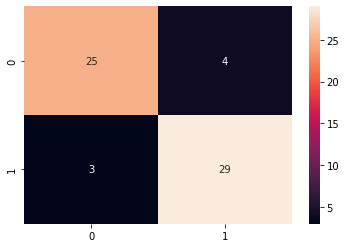

In [61]:
sns.heatmap(cm, annot=True)

In [51]:
#            Predict
#            0         1
#Actual 0    25(TN)    4(FP)
#       1    3(FN)     29(TP)

In [52]:
print('Test Accuracy score', accuracy_score(y_test, y_pred))

Test Accuracy score 0.8852459016393442


In [53]:
print('precision score', precision_score(y_test, y_pred))

precision score 0.8787878787878788


In [54]:
print('recall score', recall_score(y_test, y_pred))

recall score 0.90625


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [57]:
y_test.shape

(61,)

In [58]:
y_pred_train = nb_classifier.predict(X_train)
print('Train accuracy score', accuracy_score(y_train, y_pred_train))

Train accuracy score 0.8305785123966942


In [60]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])

In [59]:
prob = nb_classifier.predict_proba(X_test)
prob

array([[2.73751632e-01, 7.26248368e-01],
       [4.20163167e-02, 9.57983683e-01],
       [6.27842229e-02, 9.37215777e-01],
       [1.59337094e-01, 8.40662906e-01],
       [1.45241900e-02, 9.85475810e-01],
       [2.01638361e-05, 9.99979836e-01],
       [7.96652712e-05, 9.99920335e-01],
       [1.42583679e-06, 9.99998574e-01],
       [7.82366006e-01, 2.17633994e-01],
       [1.03493212e-01, 8.96506788e-01],
       [9.99945964e-01, 5.40361774e-05],
       [9.99976524e-01, 2.34757968e-05],
       [1.98511596e-02, 9.80148840e-01],
       [1.83004250e-05, 9.99981700e-01],
       [1.68575698e-07, 9.99999831e-01],
       [9.98393566e-01, 1.60643369e-03],
       [9.99972154e-01, 2.78457069e-05],
       [2.31187852e-03, 9.97688121e-01],
       [7.15703698e-09, 9.99999993e-01],
       [9.79639893e-01, 2.03601073e-02],
       [7.72091427e-02, 9.22790857e-01],
       [9.99816866e-01, 1.83134270e-04],
       [1.11728806e-05, 9.99988827e-01],
       [9.99168123e-01, 8.31876719e-04],
       [8.601300